# Pymaceuticals Inc.
---
The combined dataset included 249 mice, one of which was a duplicate mouse.  The cleaned dataset therefore had 248 mice.
51% were male, 49% were female.
There were 10 drugs in the test. The most effective at shrinking tumore volume were Capomulin and Ceftamin, however Ramicane needs additional research.  

Propriva and Natisol performed simularly to the Placebo test group.
The correlation between mouse weight and the average tumor volume is: 
PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)

When reviewing the data just based on the Mean, Median, Var, Std Dev and SEM of tumor size; Ramicane had the least variability of tumor size when compared to Capomulin and Ceftamin.  

It appears that the test group Zoniferol had the most loss of life.

In [32]:
%matplotlib inline

Prepare the Data:
1) Set up depencies
2) Call in 2 data files (df_path"csv")
3) Read in data into 2 dataframes
4) Merge datasets
5) Create datatable in order of mouse it, timepoint...etc

Manipulate the Data:
Datasets were merged into single dataframe: "combined_data"
The number of mice are shown in "combined_data: 249
There is one duplicate mouse ("g989") and a dup_mouse_df was created to disply g989's data
A clean dataframe was created after dropping mouse g989
A count of remaining mice is displayed as 248.



In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

combined_data = merged_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex",
                                "Age_months", "Weight (g)"]]


# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [34]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
mice_count


249

In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint (Already rearranged data above)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_data.loc[combined_data["Mouse ID"]=="g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [38]:
# Checking the number of mice in the clean DataFrame.
remaining_mice = len(clean_df["Mouse ID"].value_counts())
remaining_mice

248

## Summary Statistics

1) Generate Summary Statistics for display in a dataframe
2) Index = drug regimen 
3) Columns = Calculate Summary Stats for tumor vol: mean, median, variance, Std Dev, SEM; using groupby and aggregate.
4) DataFrame is created with Summary Statistics

In [39]:
# Method 1 using regular pandas and jupyter to generate summary statistics in a df

# Step 1:  Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = clean_df.groupby("Drug Regimen")

# Step 2: Calculate the mean, median, variance, standard deviation, and SEM for Tumor Volume using numpy and scipy
mean = grouped_data["Tumor Volume (mm3)"].mean()
median = grouped_data["Tumor Volume (mm3)"].median()
variance = grouped_data["Tumor Volume (mm3)"].var()
std_dev = grouped_data["Tumor Volume (mm3)"].std()
sem = grouped_data["Tumor Volume (mm3)"].sem()

# Step 3: Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Vol Variance": variance, 
   "Tumor Volume Std.Dev.": std_dev, "Tumor Volume SEM ": sem})
drug_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Vol Variance,Tumor Volume Std.Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Method 2: Use Aggregate to generate a table summary statistics 

# Step 1: Using the aggregation method, produce the same summary statistics in a single line
drug_summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_summary_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Bar Charts:
1) Bar plot showing total timepoints for all mice for each drug using Pandas ("Pandas-BarChart")
2) Bar plot showing total timepoints for all mice for each drug using PyPlot ("PyPlot-BarChart")

Pie Charts:
3) Pie plot showing the distribution of female versus male mice using Pandas ("Pie-Pandas")
4) Pie plot showing the distribution of female versus male mice using PyPlot ("Pie-PyPlot")



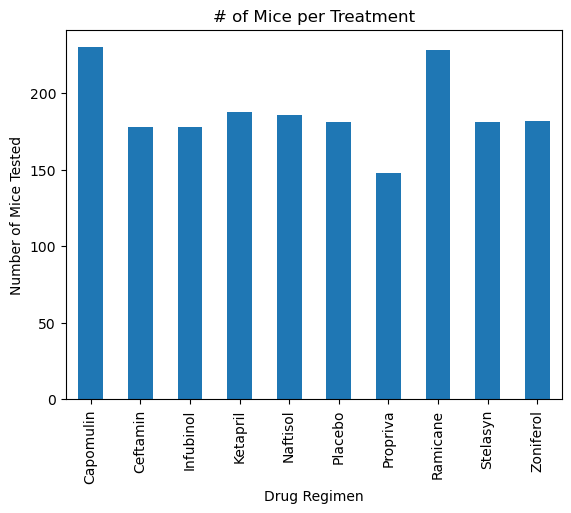

<Figure size 640x480 with 0 Axes>

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#mouse_p_treatment = clean_df["Drug Regimen"].value_counts()
mouse_p_treatment= clean_df.groupby("Drug Regimen")["Timepoint"].count()
plot_pandas = mouse_p_treatment.plot.bar(color="tab:blue")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("# of Mice per Treatment")
plt.show()
plt.savefig("Pandas-BarChart")

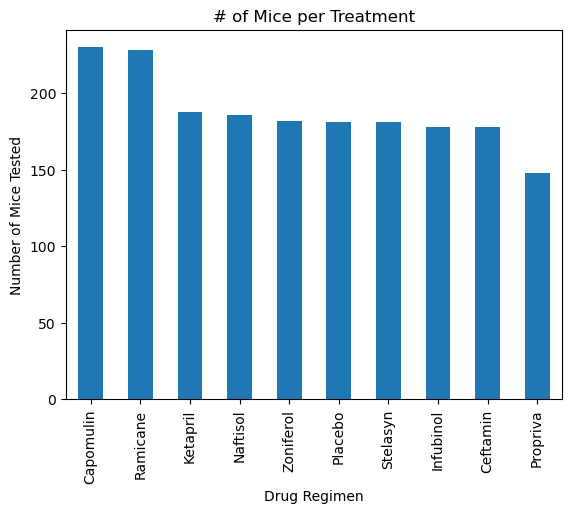

<Figure size 640x480 with 0 Axes>

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_p_treatment = clean_df["Drug Regimen"].value_counts()
drug_count = clean_df.groupby("Drug Regimen")["Timepoint"].count()
plot_pandas = mouse_p_treatment.plot.bar(color="tab:blue")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("# of Mice per Treatment")
plt.show()
plt.savefig("Pandas-BarChart")

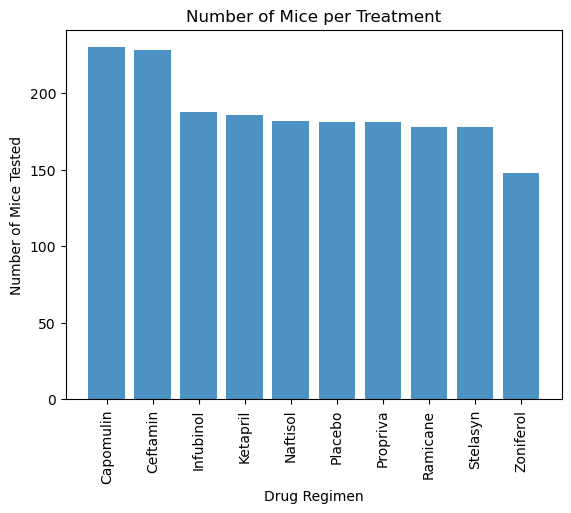

<Figure size 640x480 with 0 Axes>

In [23]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Step 1: Gather data information and grpby 
drug_count = clean_df.groupby("Drug Regimen")["Timepoint"].count()

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Step 2: Set x and y plot values
x_axis = drug_count.index.values
y_axis = mouse_p_treatment

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")
plt.show()
plt.savefig("PyPlot-BarChart")


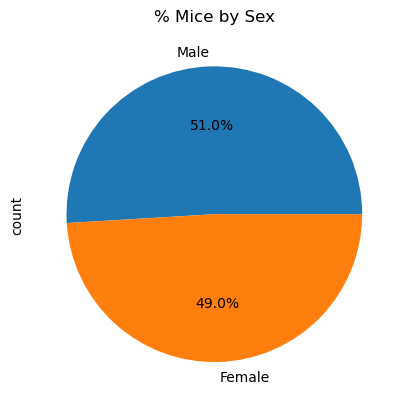

<Figure size 640x480 with 0 Axes>

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Step 1 Create the data
gender_pie = clean_df["Sex"].value_counts()

#Step 2 Tell Pandas what to do
gender_pie.plot(kind="pie", autopct="%1.1f%%")
plt.title("% Mice by Sex")
plt.show()

plt.savefig("Pie-Pandas")



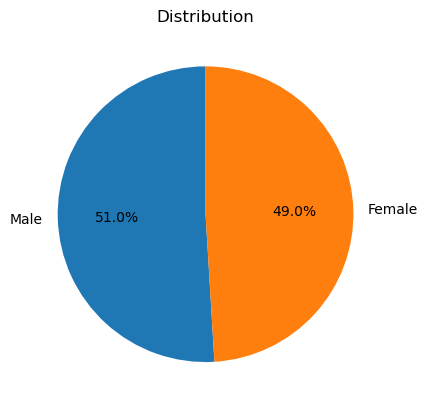

<Figure size 640x480 with 0 Axes>

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Step 1 Create the data
gender_pie = clean_df["Sex"].value_counts()

#set PyPlot values 
plt.pie(gender_pie.values, labels=gender_pie.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Distribution")

plt.show()
plt.savefig("Pie-PyPlot")

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Step 1: Set up a list for the four treatments
filtered_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Step 2: Start by getting the last (greatest) timepoint for each mouse and reset index
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

#Step 3: Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse = max_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
merged_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [27]:
# Put treatments into a list for for loop (and later for plot labels) using dataframe from previous step
filtered_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers by setting up For Loop:
for treatment in filtered_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes.  Locate = LOC
    final_tumor_volume = merged_mouse.loc[merged_mouse["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # add subset using .append to add data from for loop into the dataset
    tumor_vol_data.append(final_tumor_volume)
  
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
   
    #Print the treatment iqrs
    print(f"IQR for {treatment}: {iqr}")
          
    # Set up code to look for outliers by determining the bounds and then calculating results then print results
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    # Set up code to look for outliers using <|> using LOC  
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)| (final_tumor_volume > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")
    

IQR for Capomulin: 7.781863460000004
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ramicane: 9.098536719999998
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Infubinol: 11.477135160000003
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Ceftamin: 15.577752179999997
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


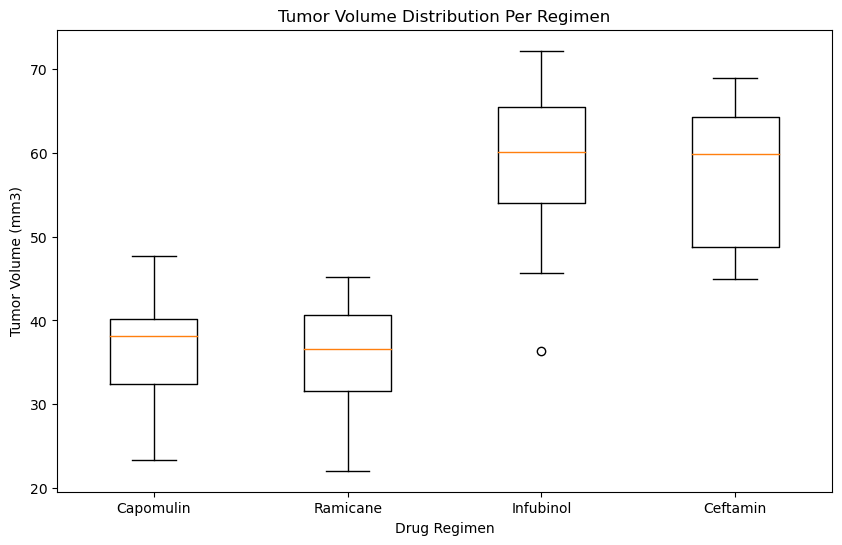

In [28]:
# Same size as the assignment
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, labels=filtered_treatments, showfliers="False")
plt.title("Tumor Volume Distribution Per Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()
#Tumor Volume (mm3)

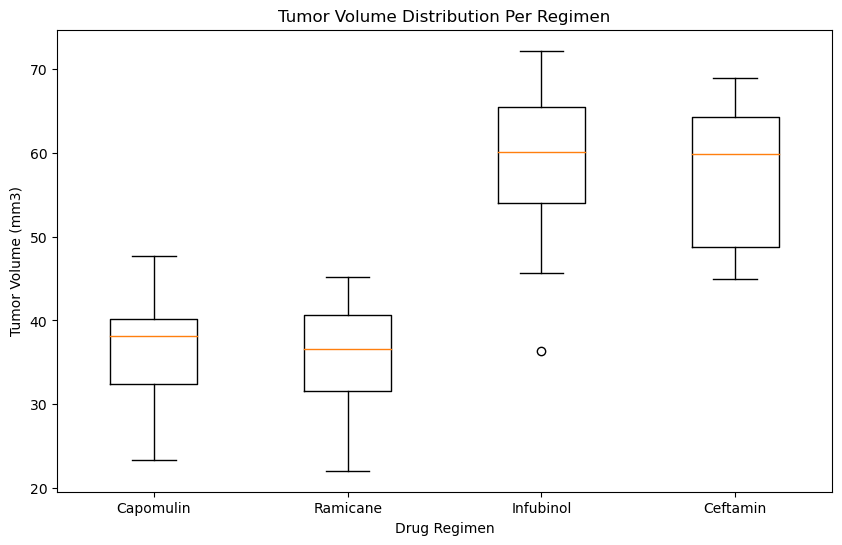

In [29]:
# Same size as the assignment
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, labels=filtered_treatments, showfliers="False")
plt.title("Tumor Volume Distribution Per Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
#plt.setp(["fliers", color="red"])
plt.show()
#Tumor Volume (mm3)

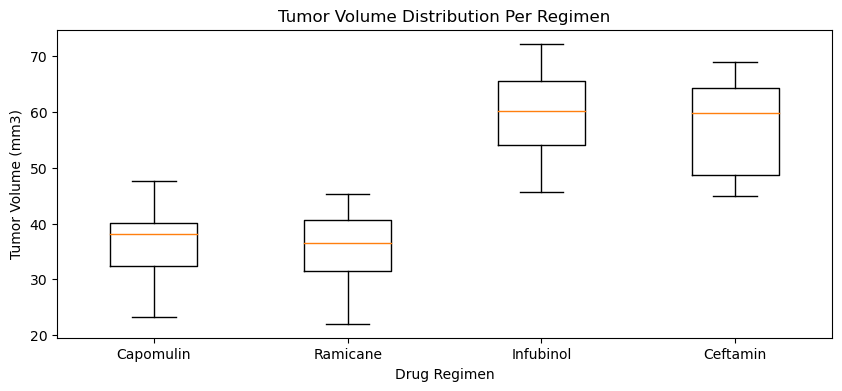

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,4))
plt.boxplot(tumor_vol_data, labels=filtered_treatments, showfliers = False)
plt.title("Tumor Volume Distribution Per Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()
#Tumor Volume (mm3)

# research on how to remove outliers: www.statology.org/seaborn-boxplot-remove-outliers

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

1) line plot is generated (tumor volume vs. time point) for one mouse treated with Capomulin. ("line-capomulin_mouse")
A scatter plot is generated (tumor volume vs. mouse weight) for Capomulin regimen. ("scatter-capomulin_mouse")

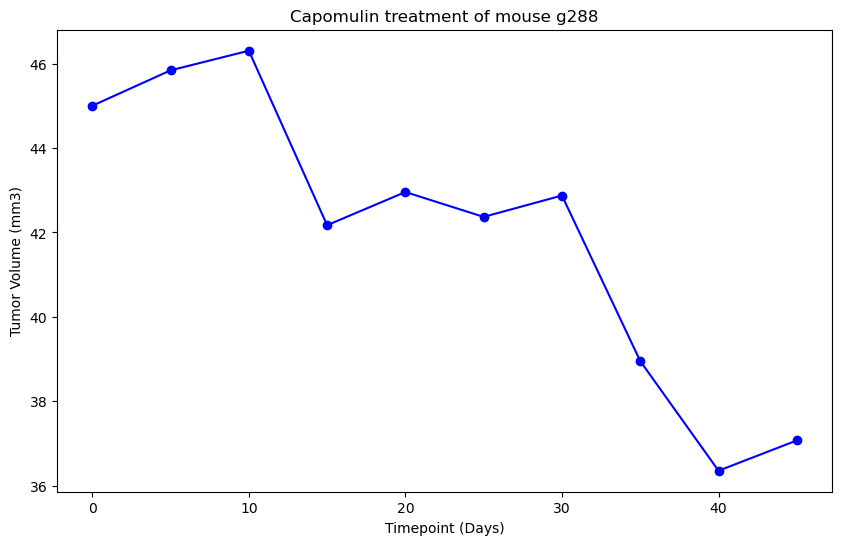

In [47]:
# Test 1 Generate a line plot of tumor volume vs. time point for a single "Random" mouse treated with Capomulin

# Step 1: Example graph uses mouse I509 for graphing purposes.  We will choose a random mouse called "the_mouse"
random_mouse = clean_df[clean_df["Drug Regimen"]=="Capomulin"]["Mouse ID"].unique()
the_mouse = random_mouse[11]

#Pull data for mouse 11 that is on Capomulin
mouse_selected = clean_df[(clean_df["Mouse ID"] == the_mouse) & (clean_df["Drug Regimen"] == "Capomulin")]

#When plotting line graph should include: title, x/ylabels, figuresize, 
plt.figure(figsize=(10,6))
plt.plot(mouse_selected["Timepoint"], mouse_selected["Tumor Volume (mm3)"], marker = 'o', color="b", linestyle="-")
plt.title(f"Capomulin treatment of mouse {the_mouse}")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel(f"Timepoint (Days)")

plt.savefig("line-capomulin_mouse")

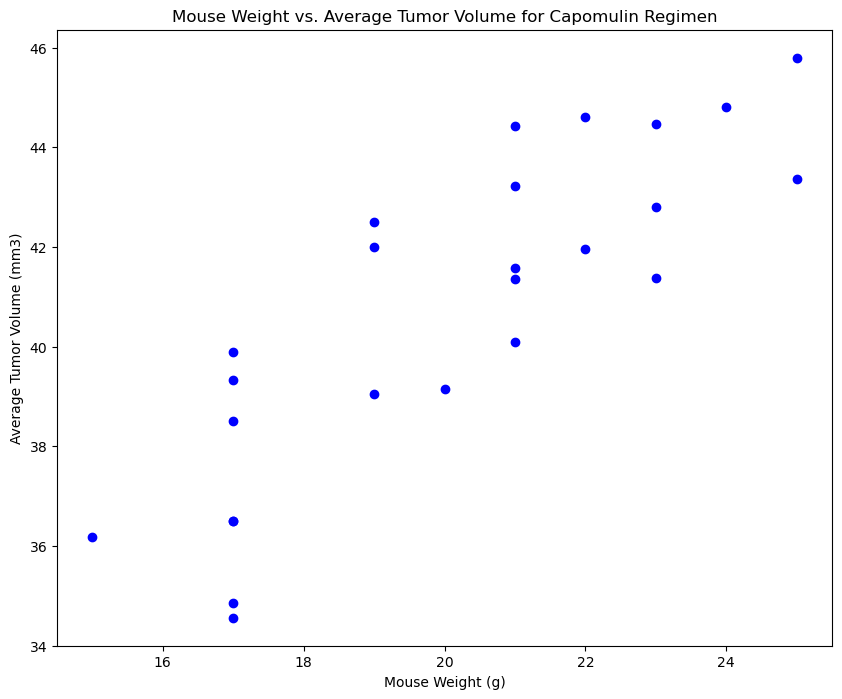

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#dataframe for only capomulin treated mice
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

#this field will group capomulin treated mice by their ID and calculate avg tumor volums
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#mouse_weight brings in mouse weight, then makes another dataframe table bringing it in
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
merged_data = pd.DataFrame({'Average Tumor Volume': average_tumor_vol, 'Mouse Weight': mouse_weight})

#creating the scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(merged_data['Mouse Weight'], merged_data['Average Tumor Volume'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.savefig("scatter-capomulin_mouse")

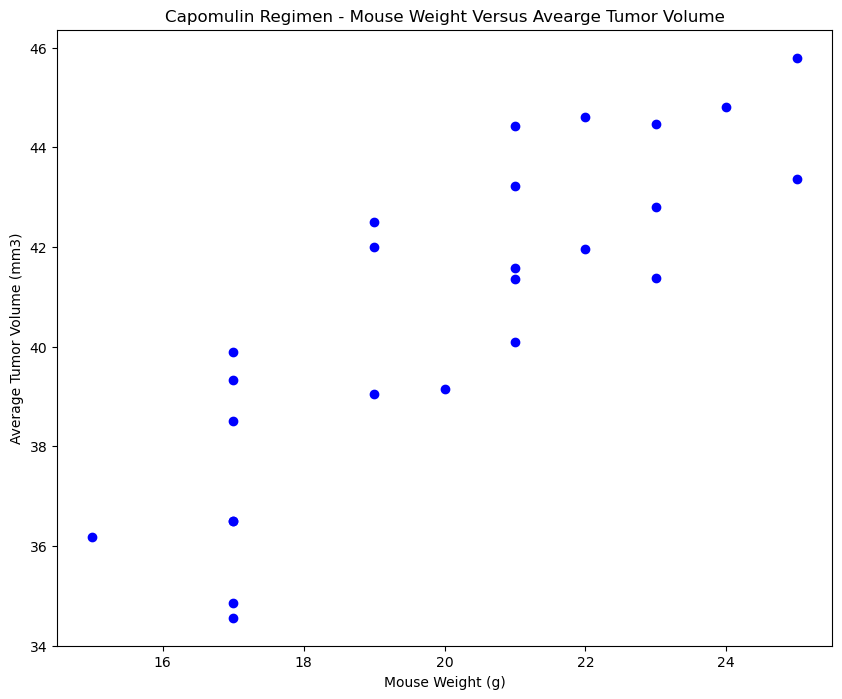

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume (.mean())for the entire Capomulin regimen

#Step 1: Set a dataframe for the drug capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

#Step 2: need to create a dataframe and use group by mouse id and average tumor size
# AND Step 3: need to create a second dataframe and use groupby to pull in mouse wight by mouse 
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

#Step 4: Create a Dataframe to create scatterplot for analysis
#tumor_merge = pd.DataFrame({"Average Tumor Volume":average_tumor_vol, "Mouse Weight": mouse_weight})
merged_data = pd.DataFrame({'Average Tumor Volume': average_tumor_vol, 'Mouse Weight': mouse_weight})


#Step 5: Create figsize, scatter(data), title, x/y labels, show and savefig

plt.figure(figsize=(10,8))
plt.scatter(merged_data["Mouse Weight"], merged_data["Average Tumor Volume"], color="blue")
#plt.scatter(merged_data["Mouse Weight'], merged_data['Average Tumor Volume'], color='blue')
plt.title("Capomulin Regimen - Mouse Weight Versus Avearge Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()




## Correlation and Regression

In [64]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Use data from last merge = plt.scatter(merged_data["Mouse Weight"], merged_data["Average Tumor Volume"])
correlation1 = st.pearsonr(merged_data["Mouse Weight"], merged_data["Average Tumor Volume"])
print(correlation1)

print(f"The correlation between mouse weight and the average tumor volume is {correlation1}.")


PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)
The correlation between mouse weight and the average tumor volume is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07).


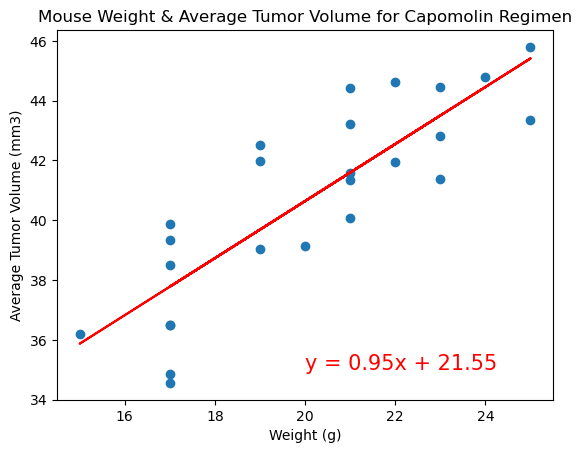

In [59]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = merged_data["Mouse Weight"]
y_values = merged_data["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20.0,35.0),fontsize=15,color="red")
plt.title("Mouse Weight & Average Tumor Volume for Capomolin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

